<a href="https://colab.research.google.com/github/FranciscaHM/Proyecto/blob/main/Lectura_HDF5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install amuse-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.2/679.2 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools_scm-8.1.0-py3-none-any.whl (43 kB)
  Created wheel for amuse-framework: filename=amuse_framework-2024.6.0-py3-none-any.whl size=629875 sha256=cbc689835e8ee630da98b8a6570869a757549924bea87b92e813652f94f7bf0e
  Stored in directory: /root/.cache/pip/wheels/96/a7/96/08b4505f65a31c950a9ef03d5cf092aaa1b151d1bdd9b30503
Successfully built amuse-framework


In [2]:
from amuse.lab import Particles
from amuse.units import units
import pandas as pd
import numpy as np
import struct
import h5py
from scipy.constants import G
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def explore_hdf5(name, obj):
    print(f"{name}: {obj}")

file_path = '/content/drive/MyDrive/sim/gas_1'

with h5py.File(file_path, 'r') as hdf:
    hdf.visititems(explore_hdf5)

AMUSE_INF: <HDF5 group "/AMUSE_INF" (0 members)>
data: <HDF5 group "/data" (1 members)>
data/0000000001: <HDF5 group "/data/0000000001" (2 members)>
data/0000000001/attributes: <HDF5 group "/data/0000000001/attributes" (19 members)>
data/0000000001/attributes/ax: <HDF5 dataset "ax": shape (5000,), type "<f8">
data/0000000001/attributes/ay: <HDF5 dataset "ay": shape (5000,), type "<f8">
data/0000000001/attributes/az: <HDF5 dataset "az": shape (5000,), type "<f8">
data/0000000001/attributes/density: <HDF5 dataset "density": shape (5000,), type "<f8">
data/0000000001/attributes/du_dt: <HDF5 dataset "du_dt": shape (5000,), type "<f8">
data/0000000001/attributes/epsilon: <HDF5 dataset "epsilon": shape (5000,), type "<f8">
data/0000000001/attributes/h_smooth: <HDF5 dataset "h_smooth": shape (5000,), type "<f8">
data/0000000001/attributes/mass: <HDF5 dataset "mass": shape (5000,), type "<f8">
data/0000000001/attributes/num_neighbours: <HDF5 dataset "num_neighbours": shape (5000,), type "<f8">

In [ ]:
ax = 'data/0000000001/attributes/ax'
ay = 'data/0000000001/attributes/ay'
az = 'data/0000000001/attributes/az'
density = 'data/0000000001/attributes/density'
du_dt = 'data/0000000001/attributes/du_dt'
epsilon = 'data/0000000001/attributes/epsilon'
h_smooth = 'data/0000000001/attributes/h_smooth'
mass = 'data/0000000001/attributes/mass'
num_neighbours = 'data/0000000001/attributes/num_neighbours'
pressure = 'data/0000000001/attributes/pressure'
radius = 'data/0000000001/attributes/radius'
rho = 'data/0000000001/attributes/rho'
u = 'data/0000000001/attributes/u'
vx = 'data/0000000001/attributes/vx'
vy = 'data/0000000001/attributes/vy'
vz = 'data/0000000001/attributes/vz'
x = 'data/0000000001/attributes/x'
y = 'data/0000000001/attributes/y'
z = 'data/0000000001/attributes/z'

In [ ]:
def infoHDF5(path, info):
  file_path = path

  with h5py.File(file_path, 'r') as hdf:

    dataset = hdf[info]

    return np.array(dataset[:])

In [ ]:
def posiciones(path):
  posi = []
  N = len(infoHDF5(path, x))
  for i in range(N):
    posi.append([infoHDF5(path, x)[i], infoHDF5(path, y)[i], infoHDF5(path, z)[i]])
  return np.array(posi)

In [ ]:
def centro_potencial(r,m,rad):
  N = len(m)
  centros_potenciales = np.zeros(N)
  G = 6.67430e-11
  for i in range(N):
    for j in range(N):
      if i != j:
        r_ij = np.linalg.norm(r[i] - r[j])
        centros_potenciales[i] += -G * m[i] * m[j] / np.sqrt(r_ij**2 + rad**2)

  indice_centro_potencial = np.argmin(centros_potenciales)
  centro_potencial = r[indice_centro_potencial]
  return centro_potencial

In [ ]:
centroMg1 = centro_potencial(posiciones('/content/drive/MyDrive/sim/gas_1'), infoHDF5('/content/drive/MyDrive/sim/gas_1', mass), 0.4)
centroMs1 = centro_potencial(posiciones('/content/drive/MyDrive/sim/stars_1'), infoHDF5('/content/drive/MyDrive/sim/stars_1', mass), 0.4)

KeyboardInterrupt: 

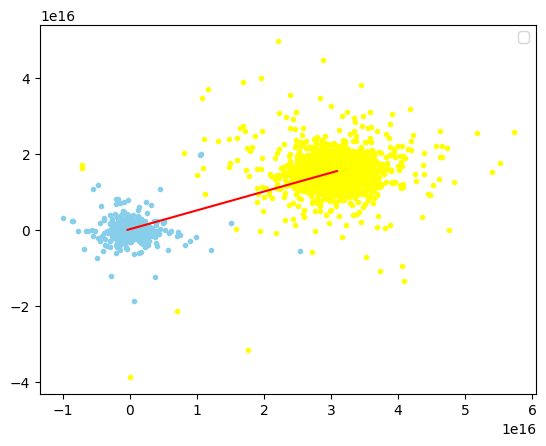

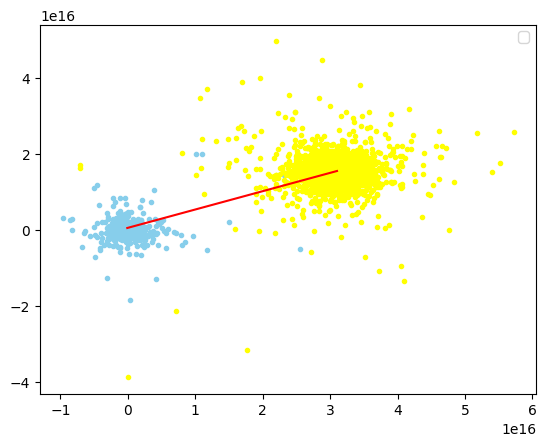

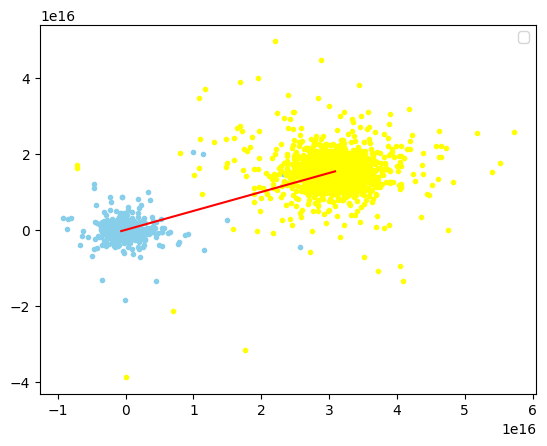

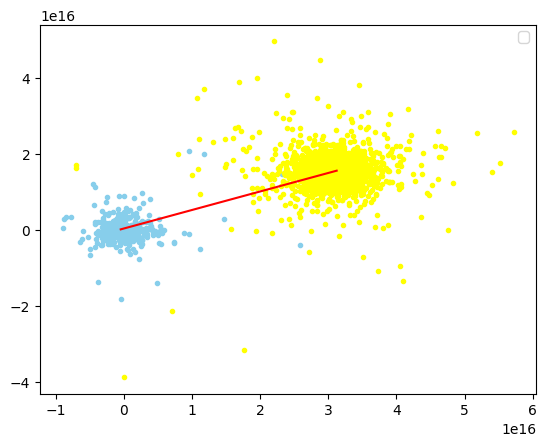

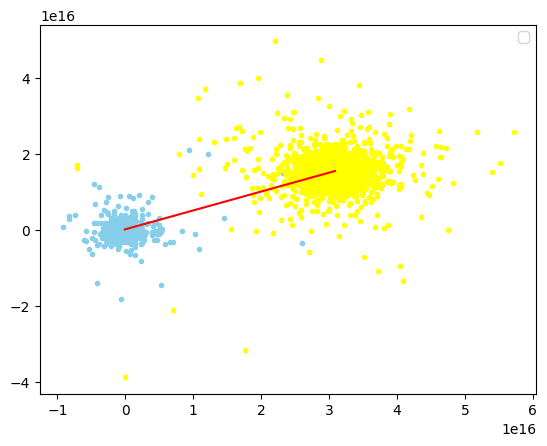

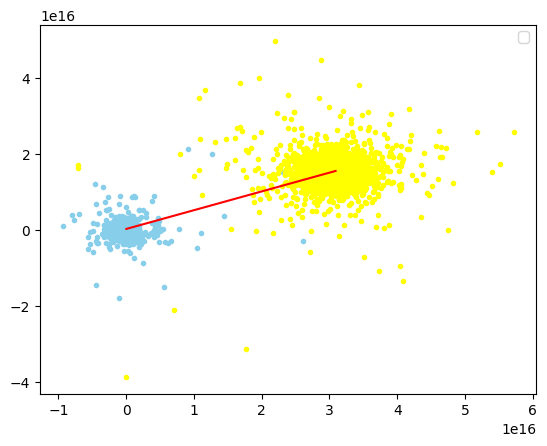

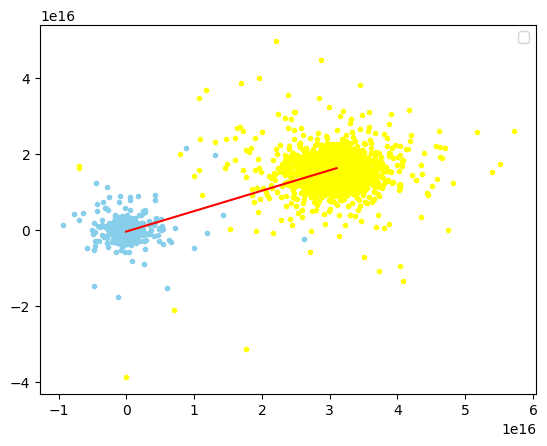

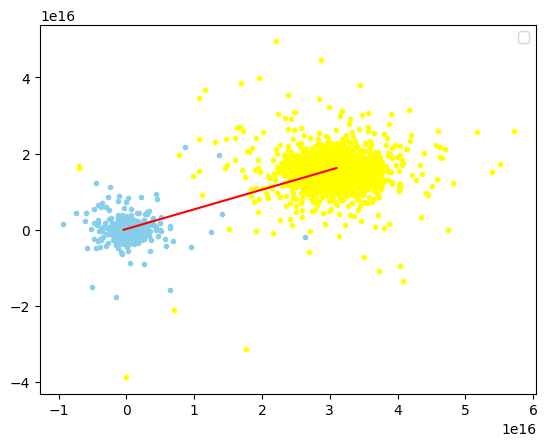

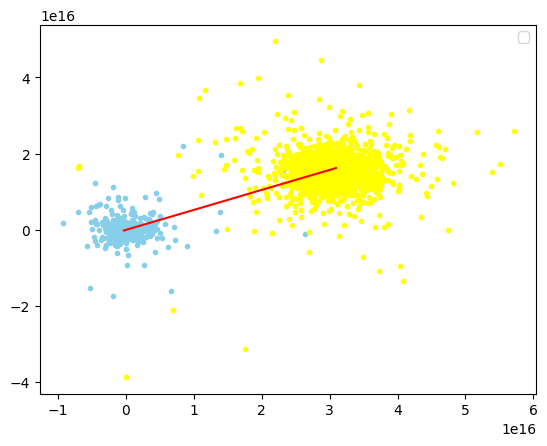

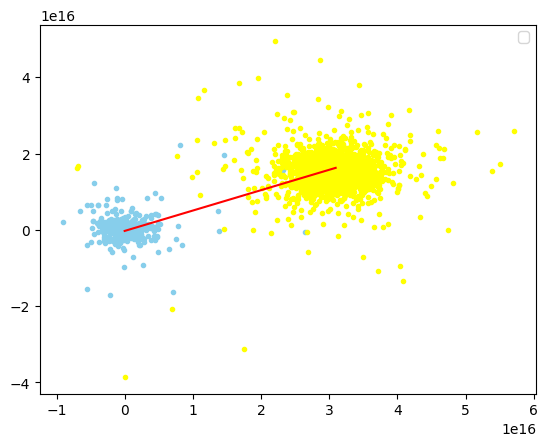

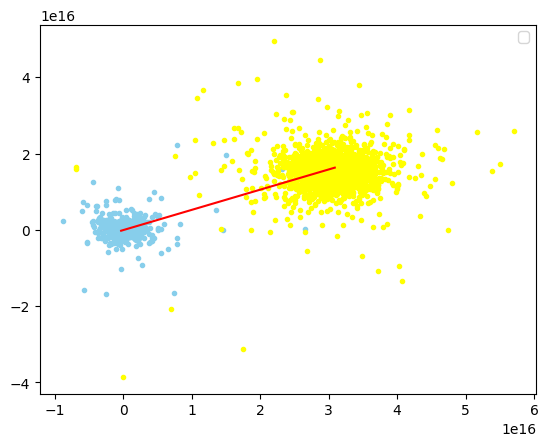

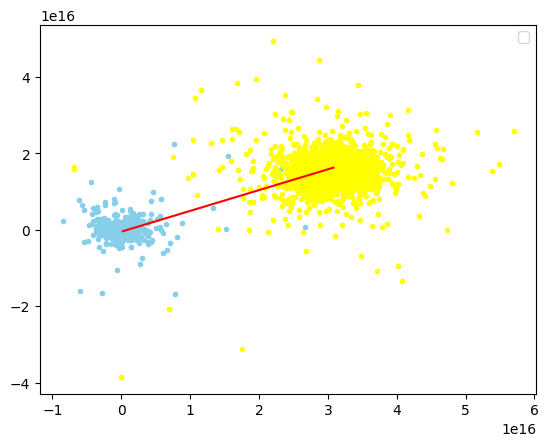

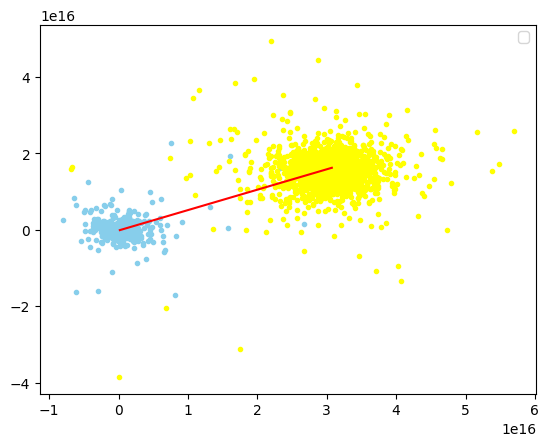

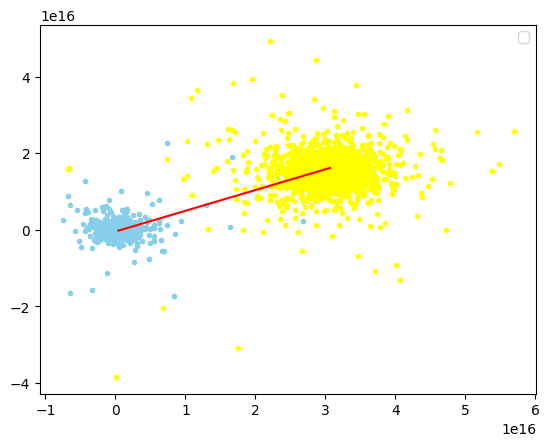

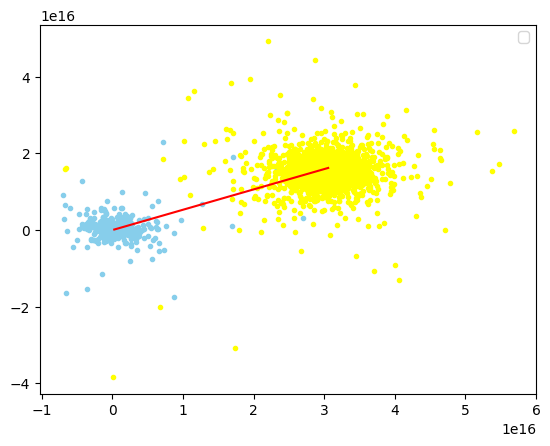

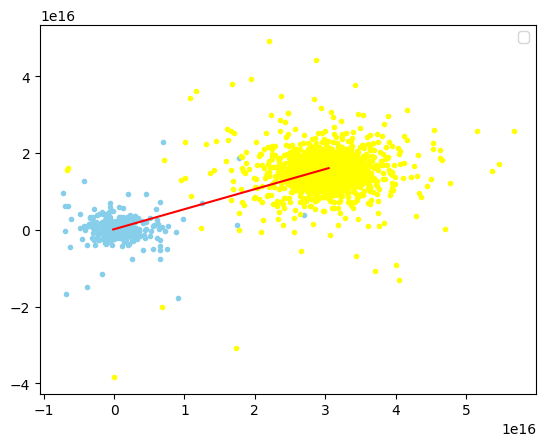

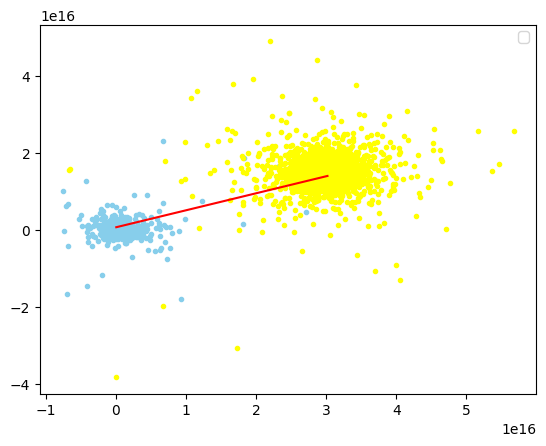

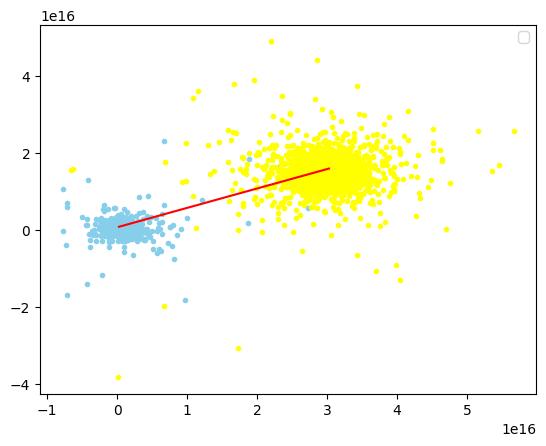

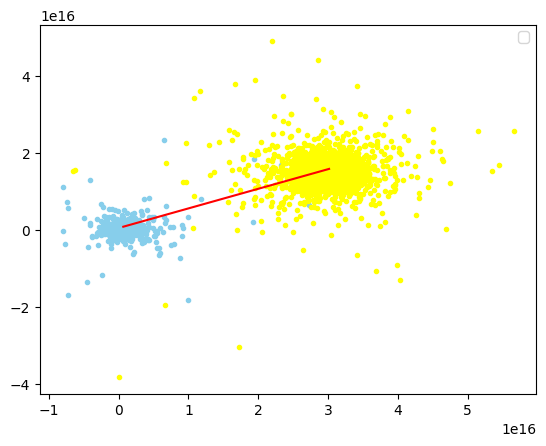

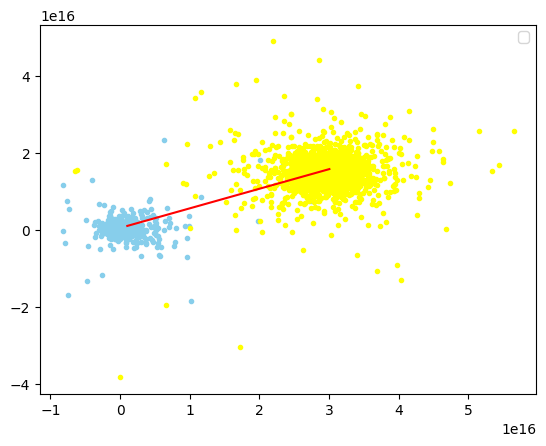

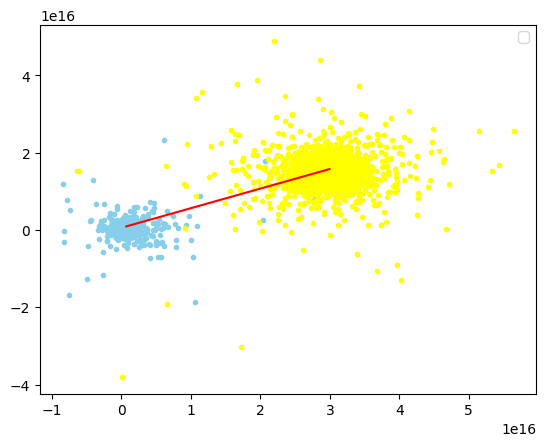

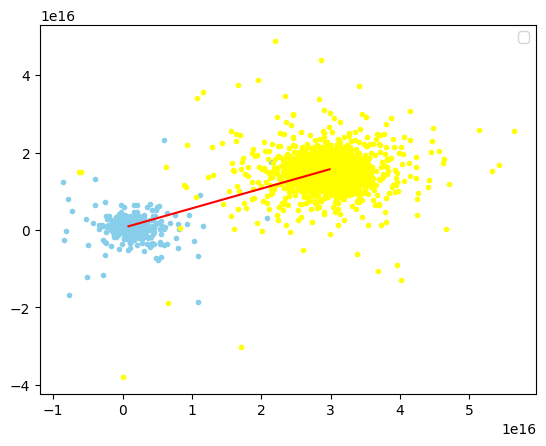

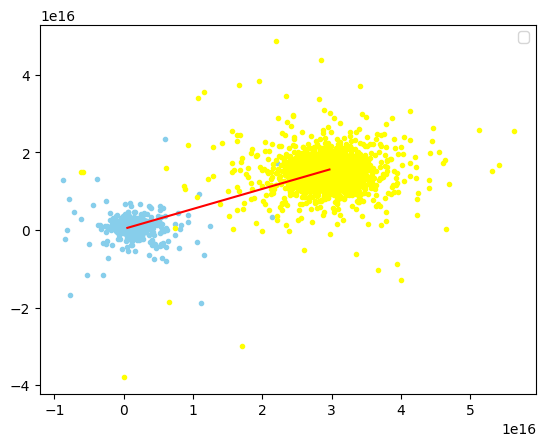

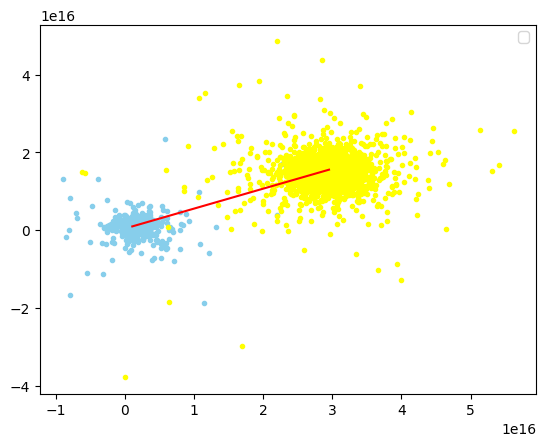

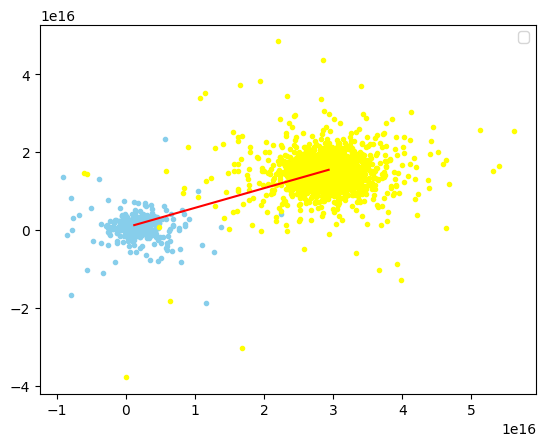

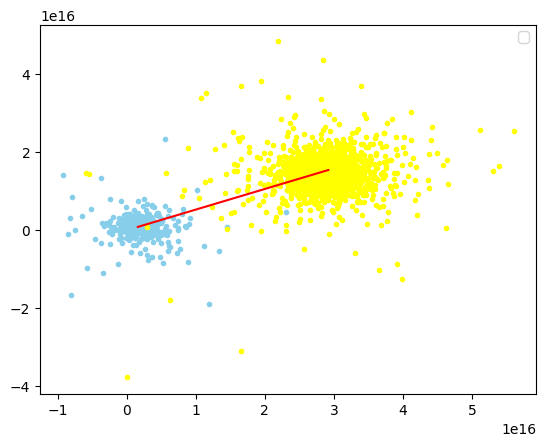

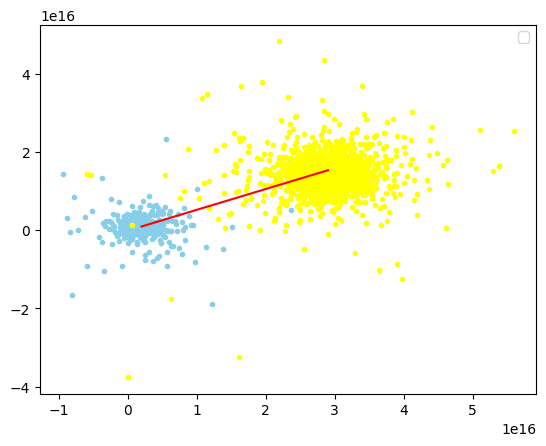

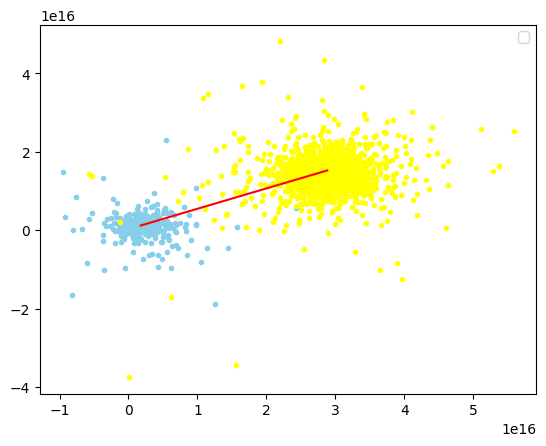

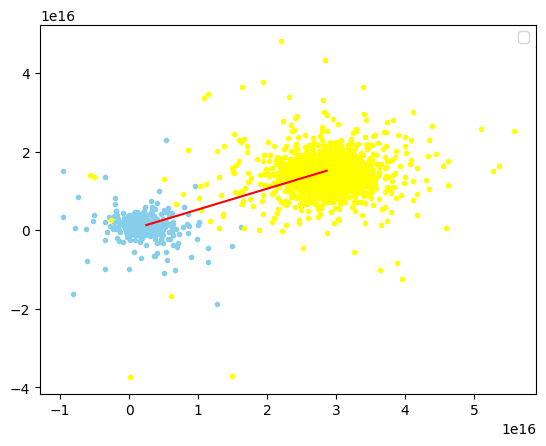

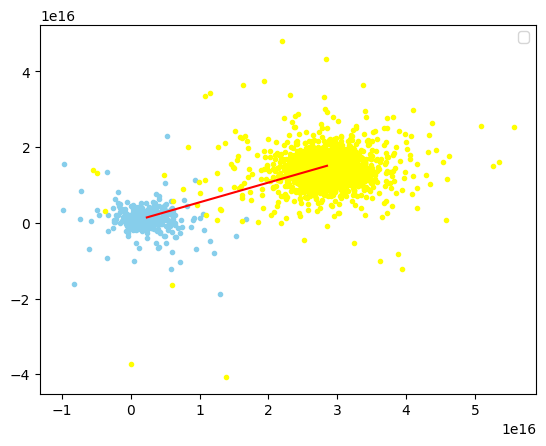

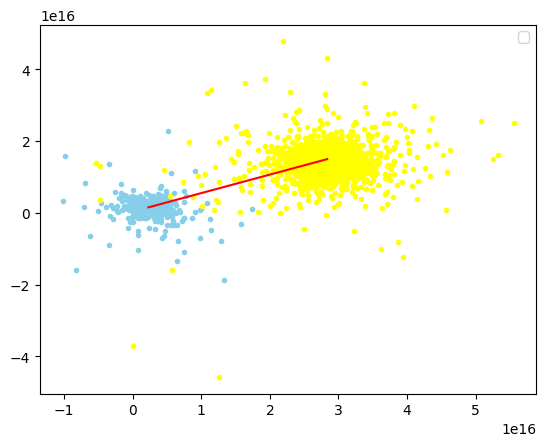

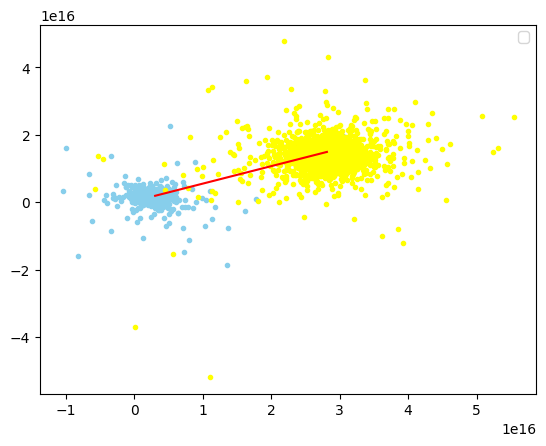

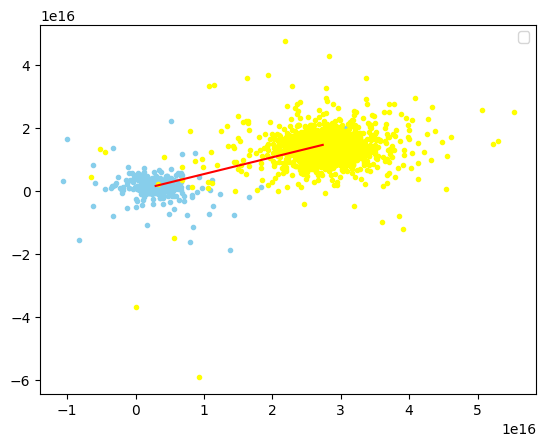

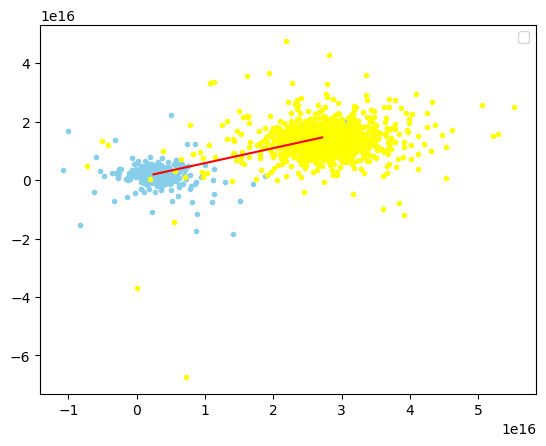

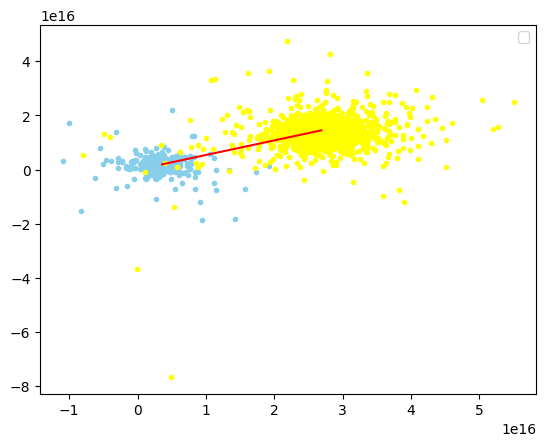

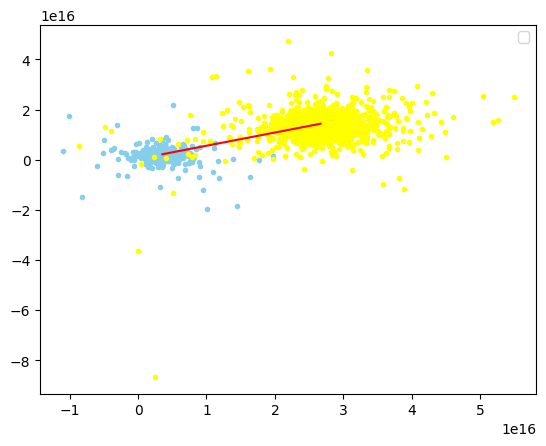

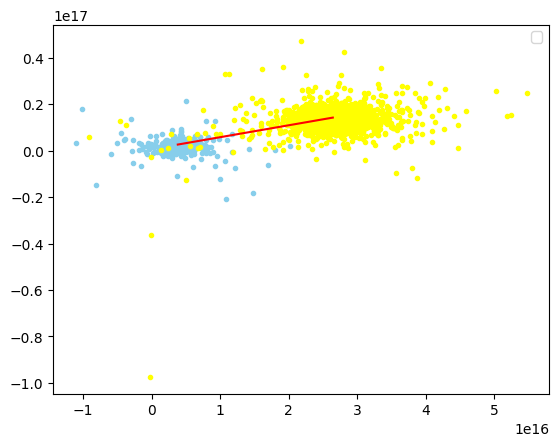

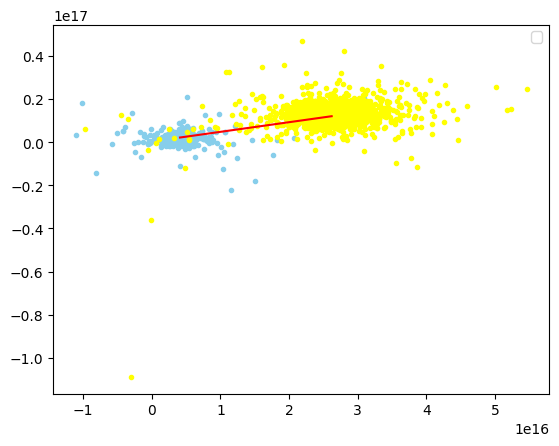

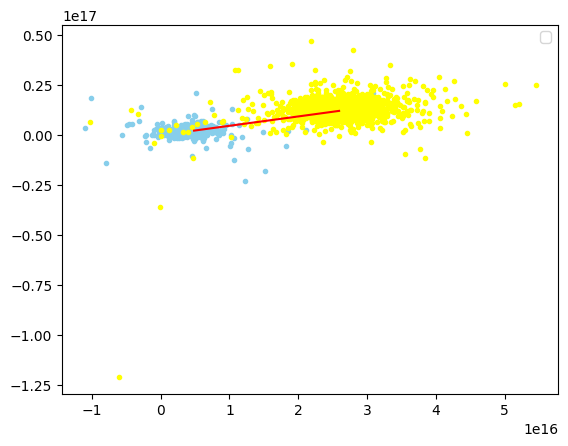

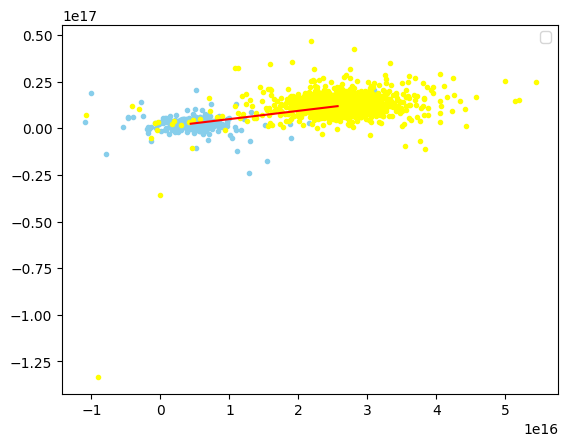

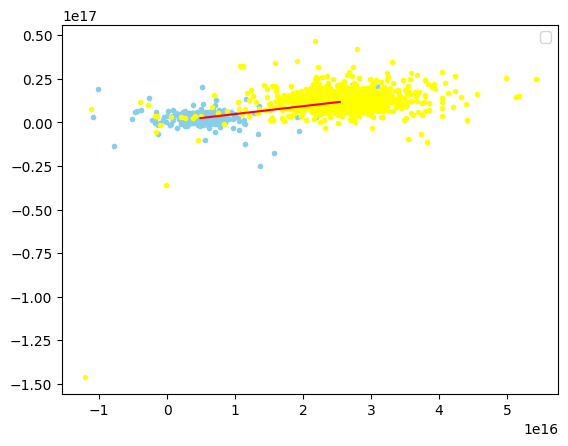

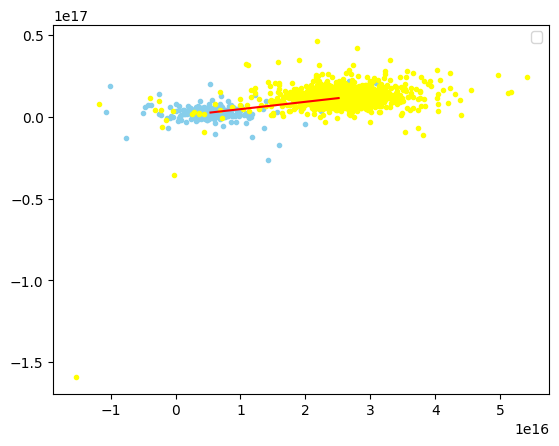

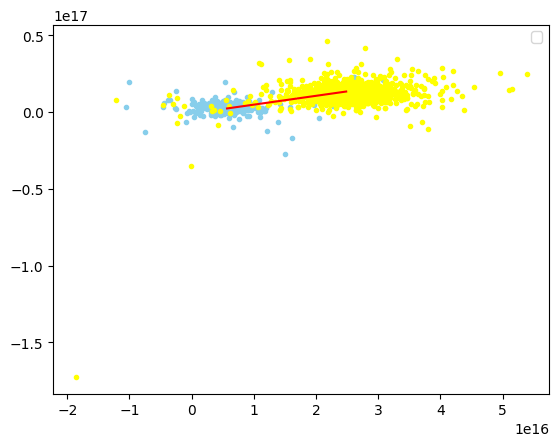

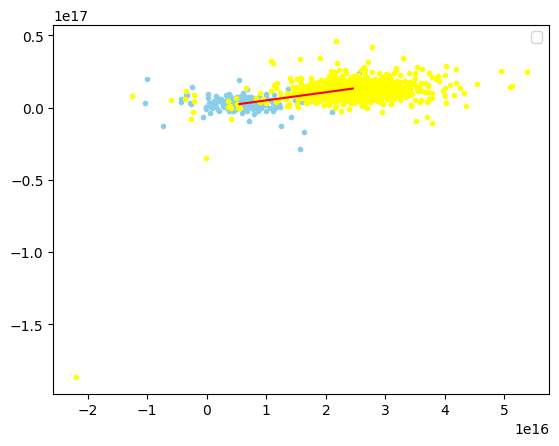

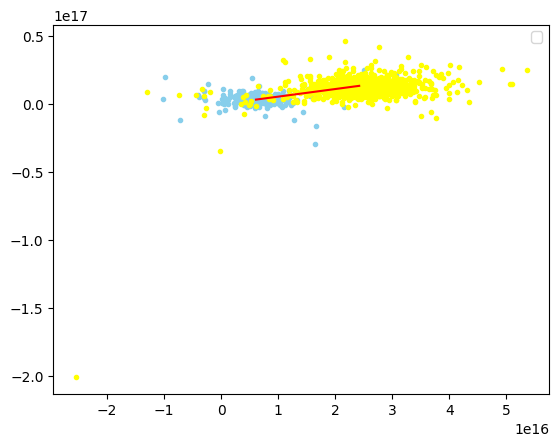

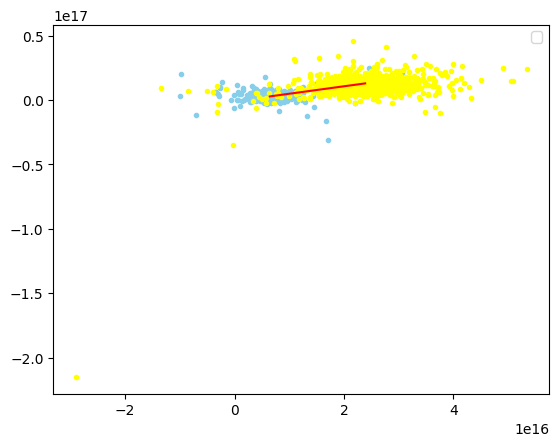

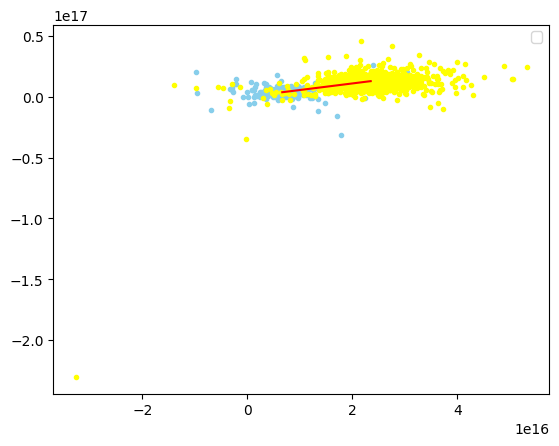

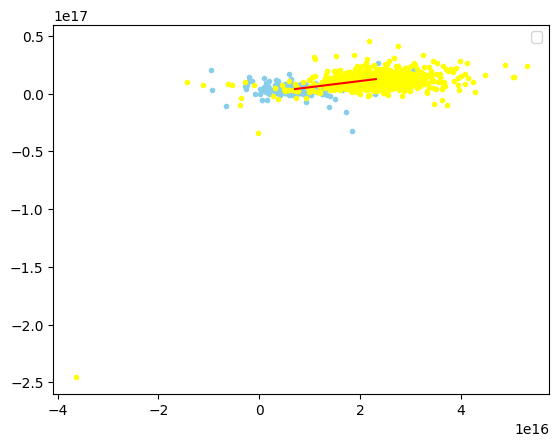

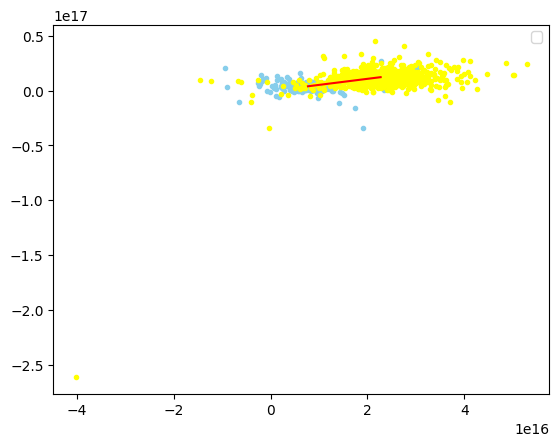

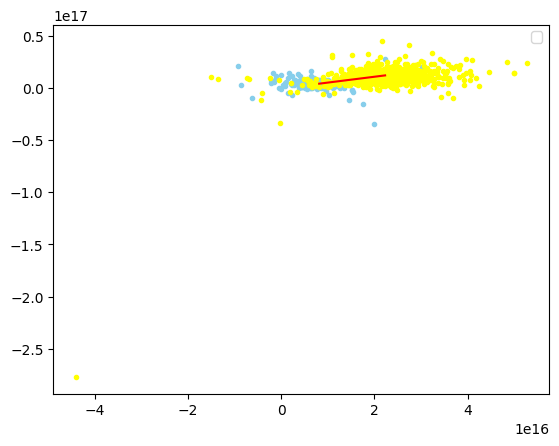

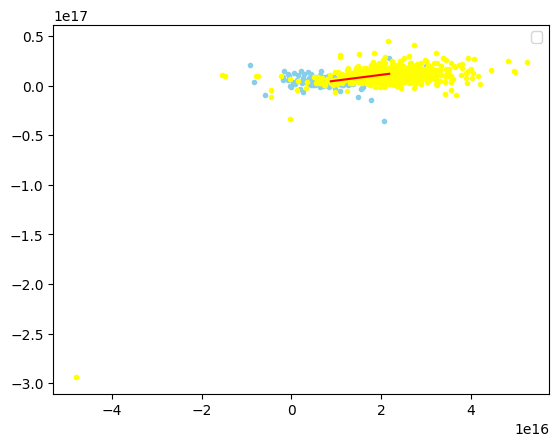

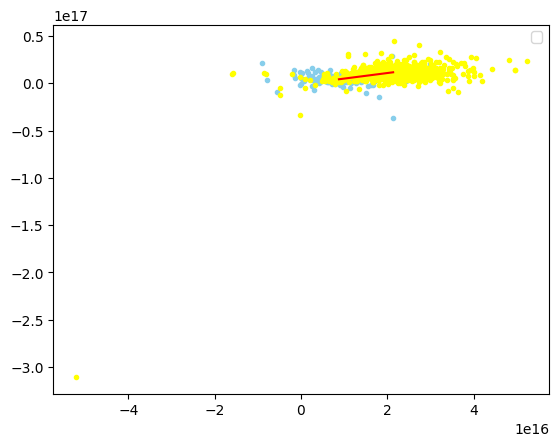

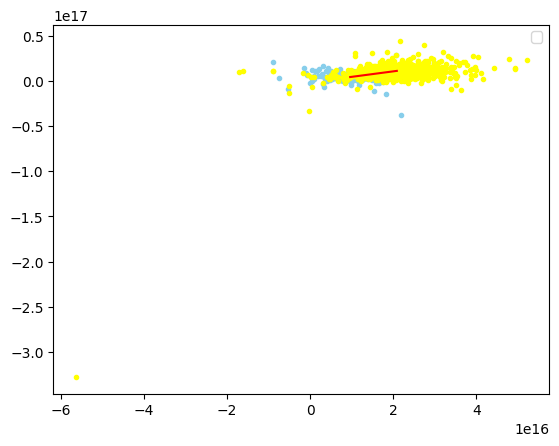

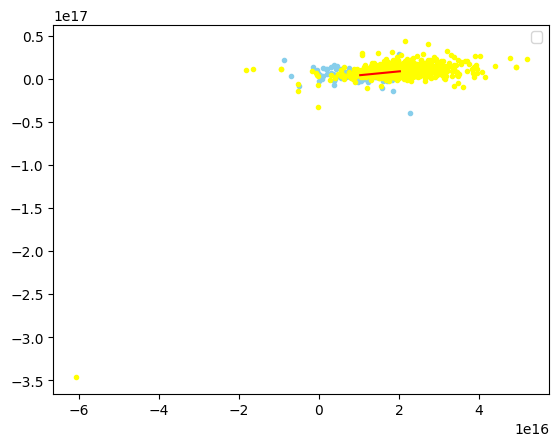

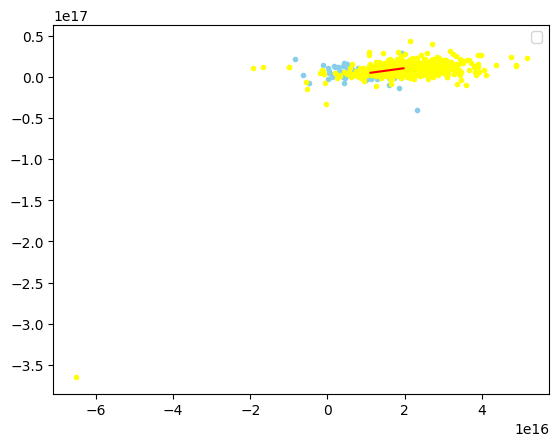

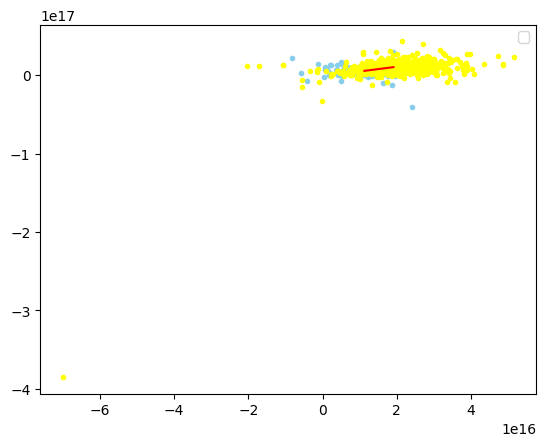

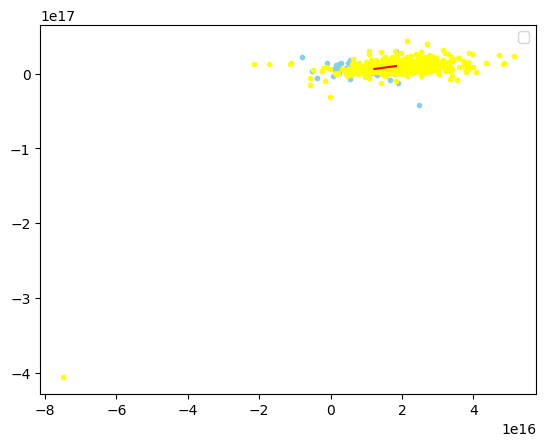

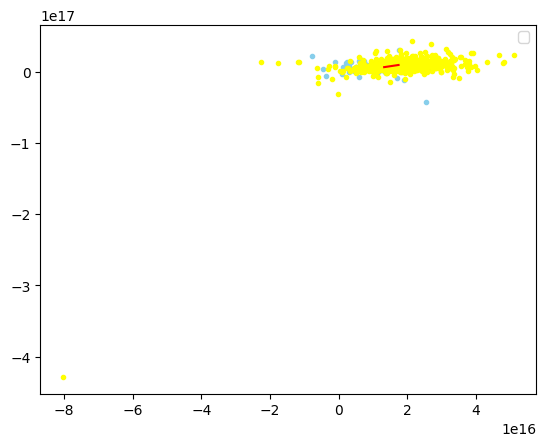

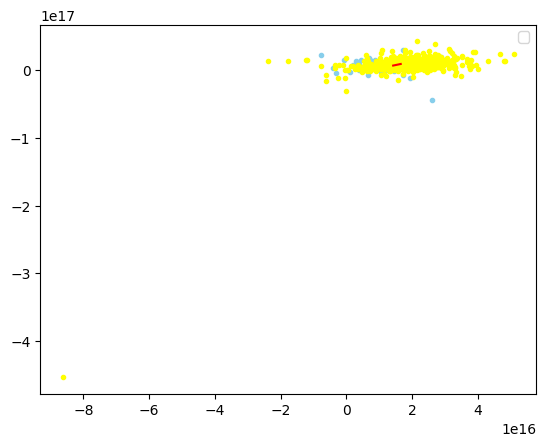

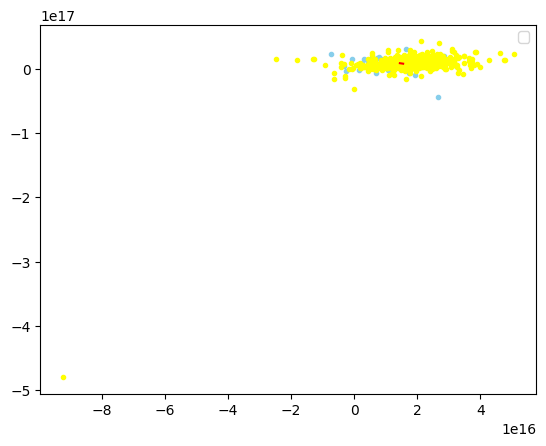

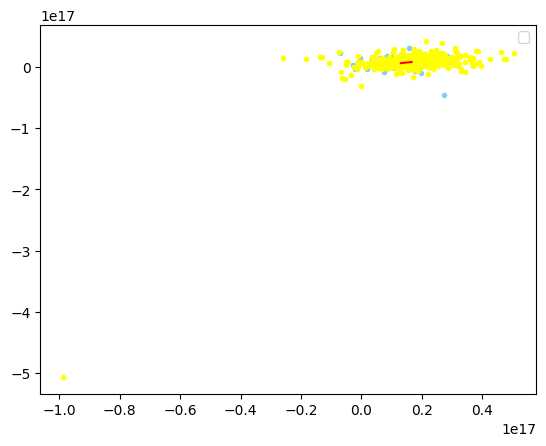

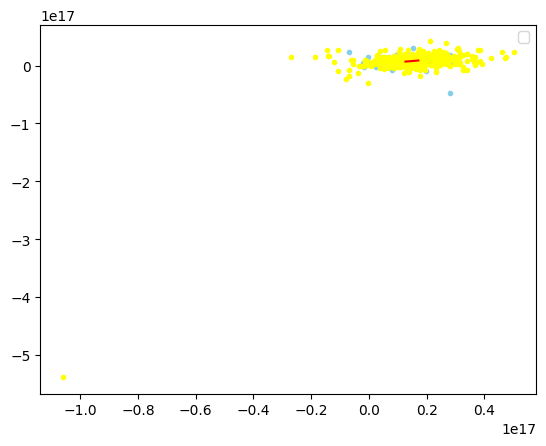

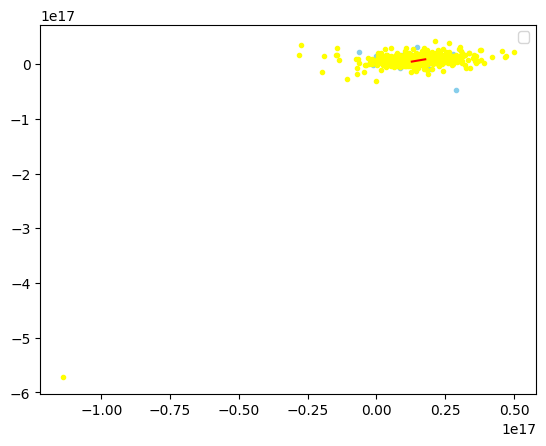

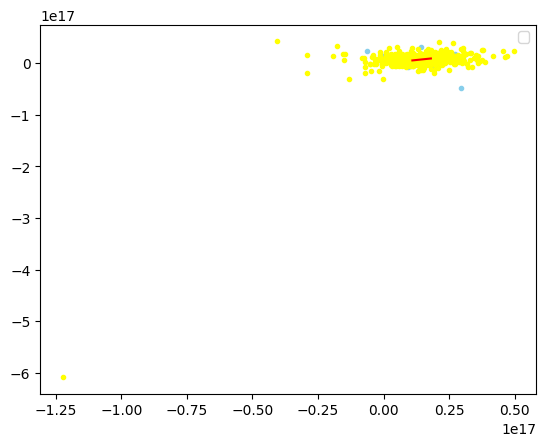

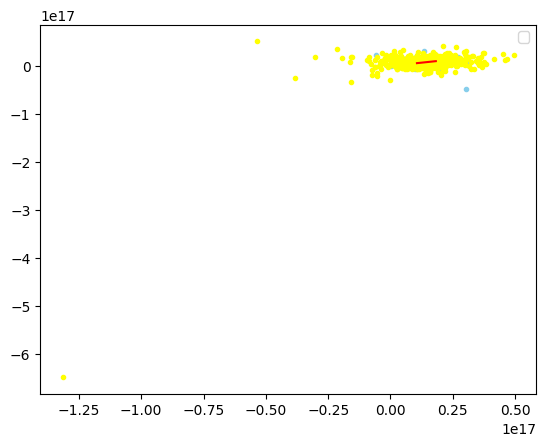

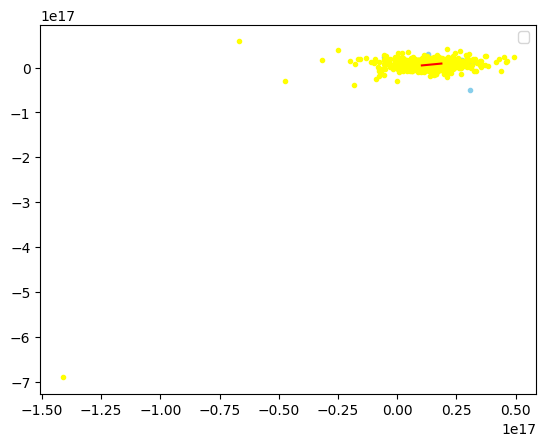

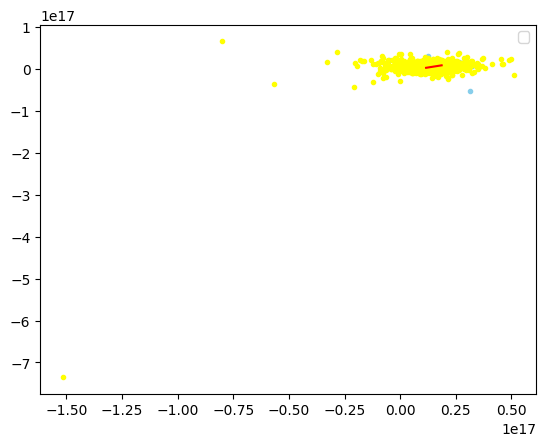

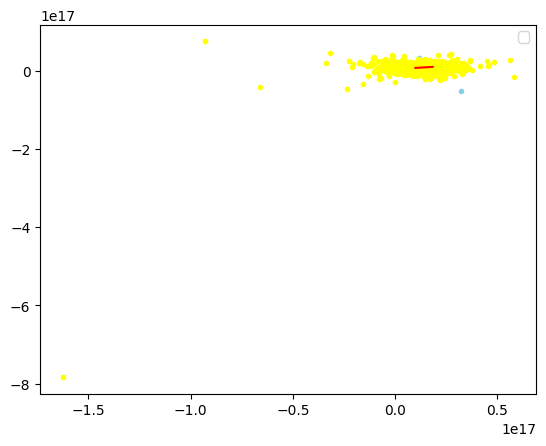

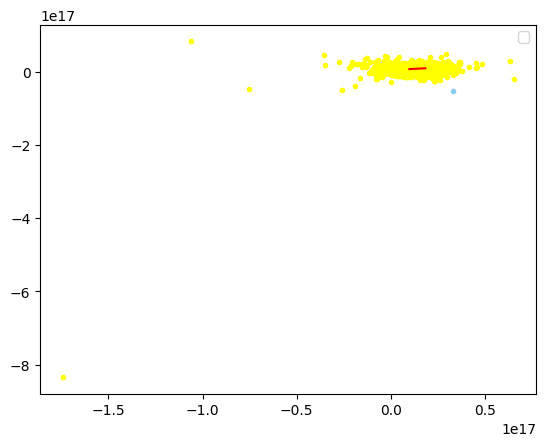

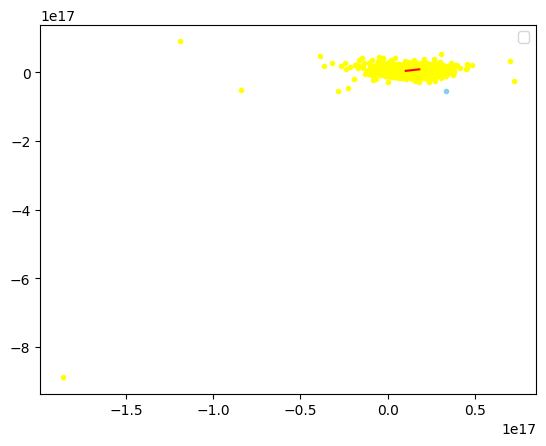

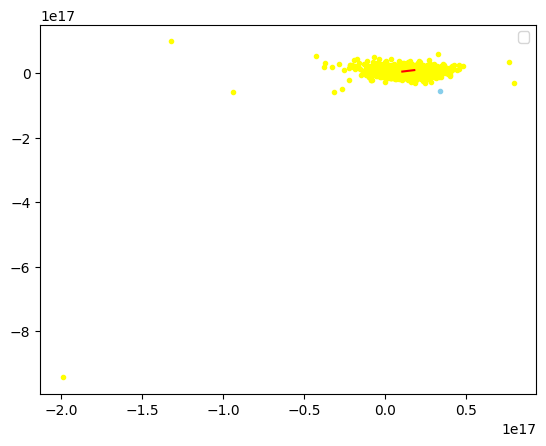

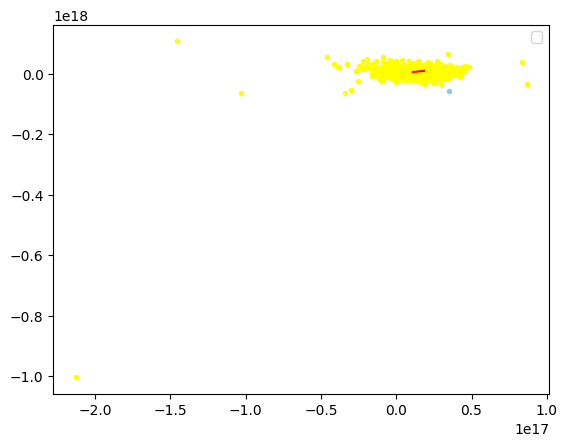

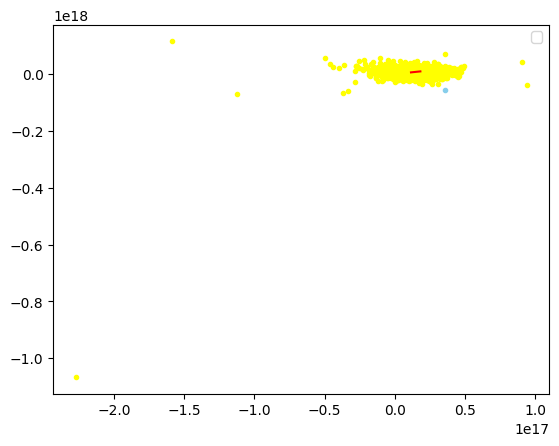

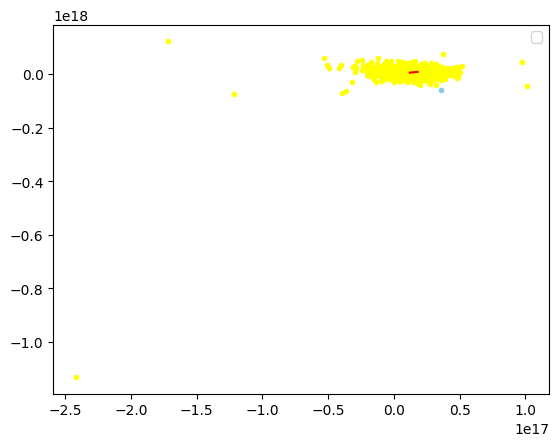

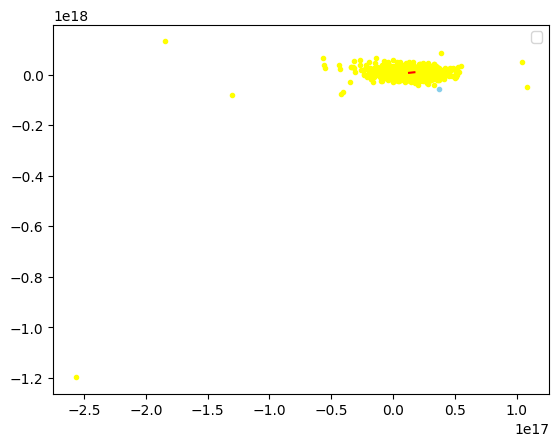

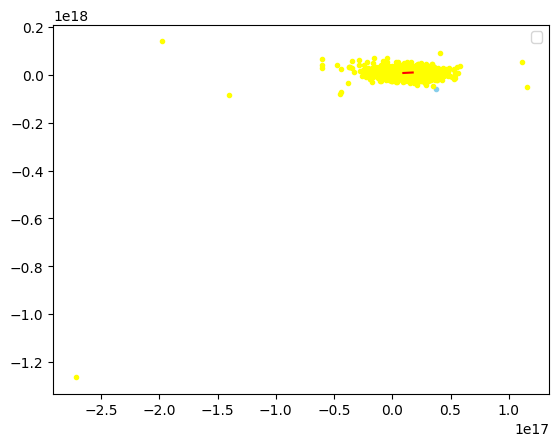

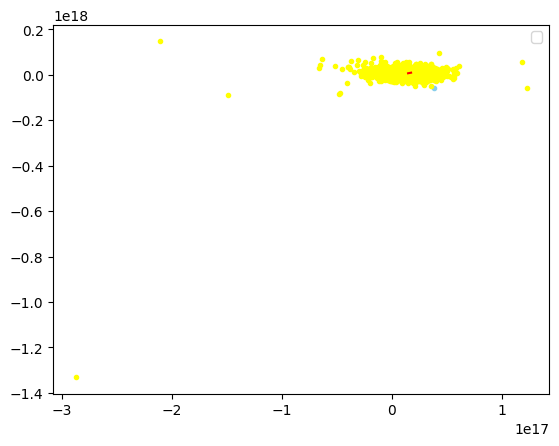

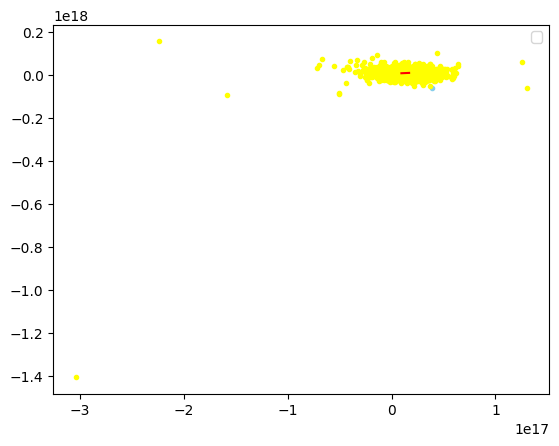

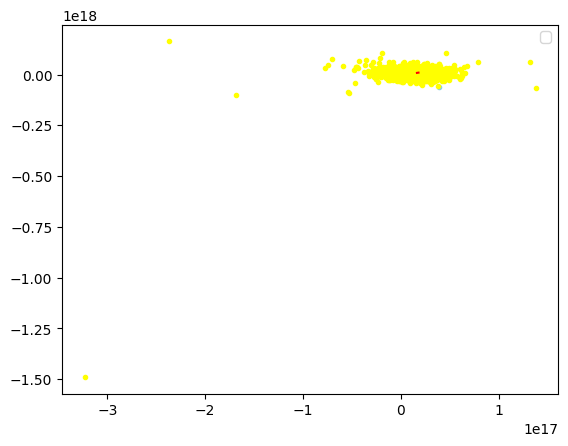

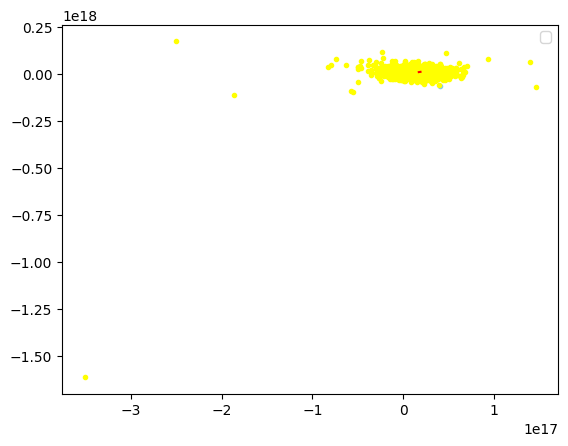

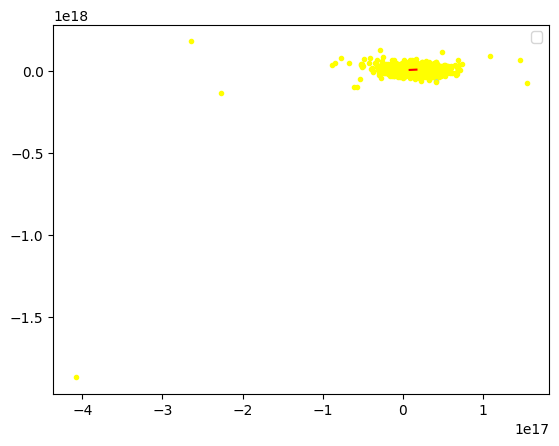

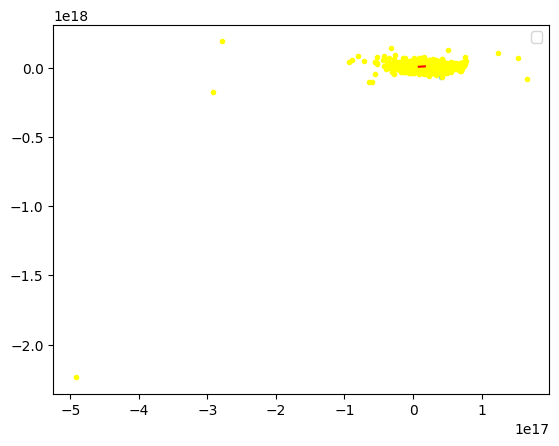

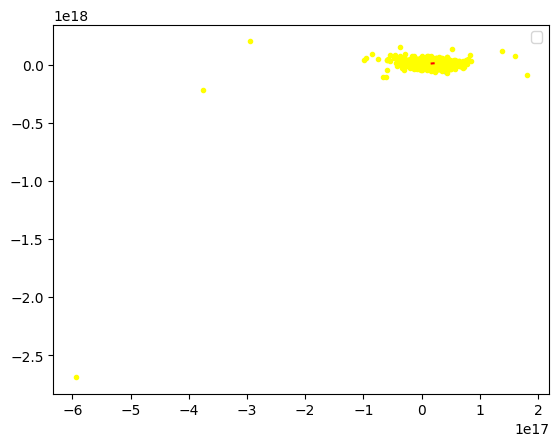

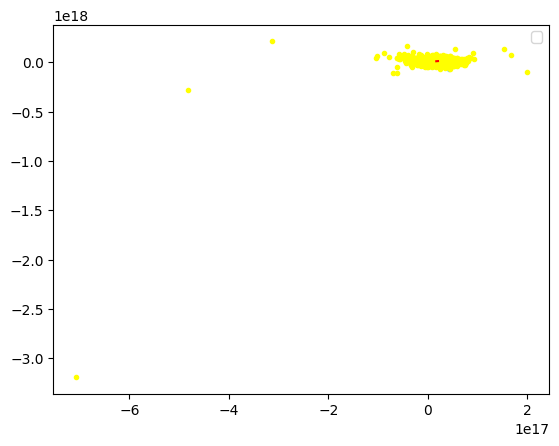

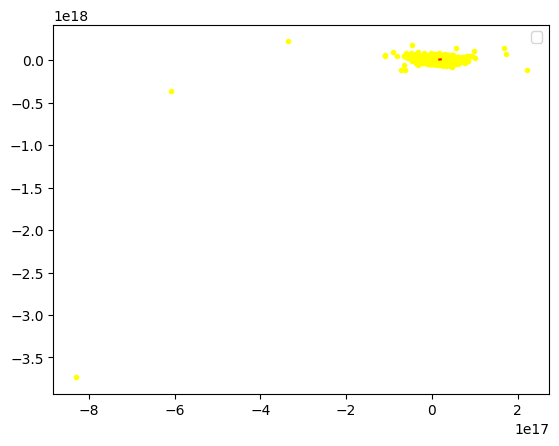

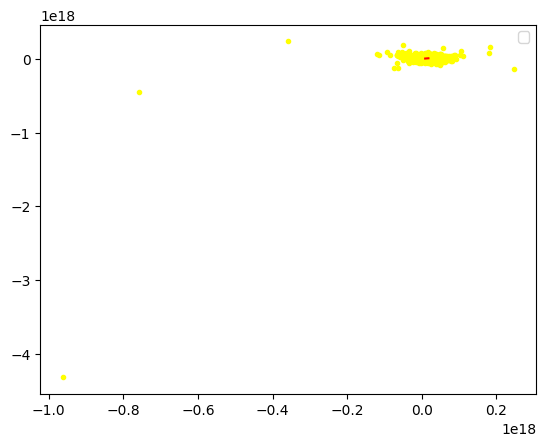

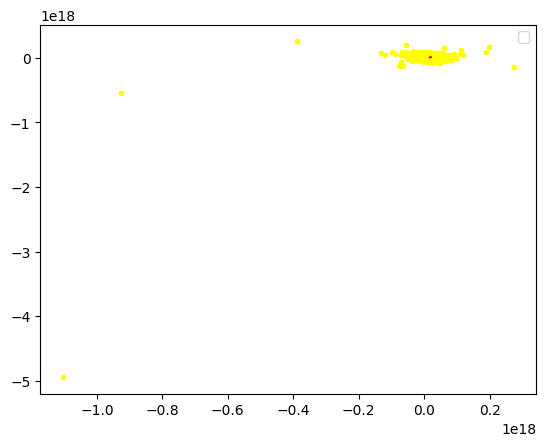

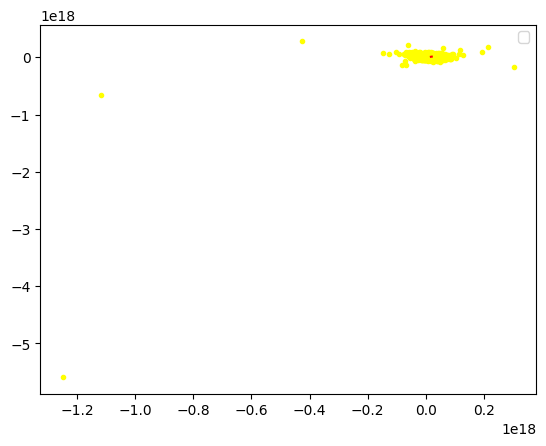

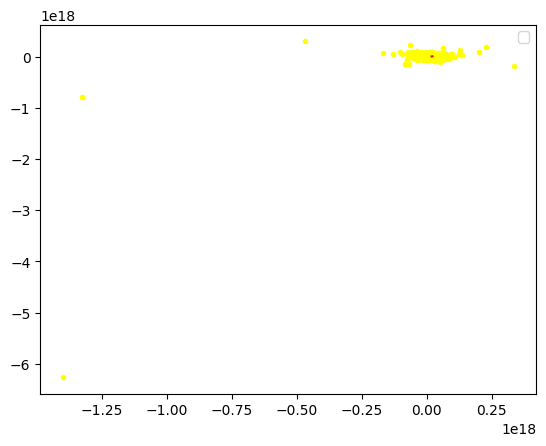

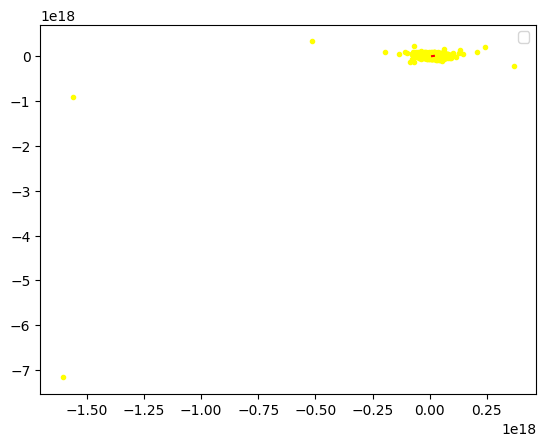

In [ ]:
from re import M



for i in range(1,91):

  path_star = '/content/drive/MyDrive/sim/stars_'+str(i)
  path_gas = '/content/drive/MyDrive/sim/gas_'+str(i)

  xs1= infoHDF5(path_star, x)
  ys1= infoHDF5(path_star, y)
  zs1= infoHDF5(path_star, z)

  xg1= infoHDF5(path_gas, x)
  yg1= infoHDF5(path_gas, y)
  zg1= infoHDF5(path_gas, z)

  #Vamos a trabajar en unidades de masa solar.

  #Para la estrella 1:
  ms1 = infoHDF5(path_star, mass)
  mTots1 = np.sum(infoHDF5(path_star, mass))
  centerMs1 = centro_potencial(posiciones(path_star), ms1, 0.4)
  #segRatMs1 = star_data[i].mass_segregation_ratio()
  #print(segRatMs1)

  #Para el gas uno:
  mg1 = infoHDF5(path_gas, mass)
  mTotg1 = np.sum(infoHDF5(path_gas, mass))
  centerMg1 = centro_potencial(posiciones(path_gas), ms1, 0.4)
  #segRatMg1 = gas_data[i].mass_segregation_ratio()

  plt.plot(xs1,ys1, '.', color='skyblue')
  #plt.plot(centerMs1[0],segRatMs1, color='blue')
  plt.plot(xg1,yg1, '.', color='yellow')
  plt.plot([centerMs1[0],centerMg1[0]],[centerMs1[1],centerMg1[1]], color='red')
  plt.legend()
  plt.show()

In [ ]:
from re import M



for i in range(1,91):

  path_star = '/content/drive/MyDrive/sim/stars_'+str(i)
  path_gas = '/content/drive/MyDrive/sim/gas_'+str(i)

  xs1= infoHDF5(path_star, x)
  ys1= infoHDF5(path_star, y)
  zs1= infoHDF5(path_star, z)

  xg1= infoHDF5(path_gas, x)
  yg1= infoHDF5(path_gas, y)
  zg1= infoHDF5(path_gas, z)

  #Vamos a trabajar en unidades de masa solar.

  #Para la estrella 1:
  ms1 = infoHDF5(path_star, mass)
  mTots1 = np.sum(infoHDF5(path_star, mass))
  centerMs1 = centro_potencial(posiciones(path_star), ms1, 0.4)
  #segRatMs1 = star_data[i].mass_segregation_ratio()
  #print(segRatMs1)

  #Para el gas uno:
  mg1 = infoHDF5(path_gas, mass)
  mTotg1 = np.sum(infoHDF5(path_gas, mass))
  centerMg1 = centro_potencial(posiciones(path_gas), ms1, 0.4)
  #segRatMg1 = gas_data[i].mass_segregation_ratio()

  # Crear la figura y el gráfico 3D
  fig = plt.figure(figsize=(10, 8))
  ax = fig.add_subplot(111, projection='3d')

  # Graficar la primera galaxia en el espacio 3D
  ax.scatter(xs1, ys1, zs1, s=1, c='blue', marker='o', alpha=0.7, label='Galaxia 1')

  # Graficar la segunda galaxia en el espacio 3D
  ax.scatter(xg1, yg1, zg1, s=1, c='red', marker='o', alpha=0.7, label='Galaxia 2')

  # Graficar la línea entre los dos puntos
  ax.plot([centerMg1[0],centerMs1[0]], [centerMg1[1],centerMs1[1]], [centerMg1[2],centerMg1[2]], color='yellow', linestyle='-', linewidth=1.5, label='Distancia entre centros de masa')

  # Personalizar el gráfico
  ax.set_title("Distribución de Estrellas en Dos Galaxias con Línea de Conexión")
  ax.set_xlabel("X (kpc)")
  ax.set_ylabel("Y (kpc)")
  ax.set_zlabel("Z (kpc)")
  ax.set_facecolor("black")  # Fondo negro para simular el espacio

  # Añadir la leyenda para identificar cada galaxia y la línea
  ax.legend()

  # Mostrar la gráfica
  plt.show()